# Homework 7 - Andrea Lazzari

### Neuroscience - Avalanche Duration Probability

Calculate the avalanche duration probability 
$$ P_>(t) \quad \text{if } \quad \lambda_i = \lambda \quad \text{ for all } t \text{ and all neurons} $$

This leads, as only sketched, to the following integral:

$$ P_>(t) = \int_0^\infty d\lambda \quad \underbrace{\gamma e^{-\gamma\lambda}}_{Q(\lambda)} \cdot \big( 1- e^{-\delta \lambda} \big)^n $$

which can be solved through the **Saddle Point approximation**.



**Optional)** Create a time series 

$$ λ(t) \quad \quad \text{ with } \quad t = 1,2, \dots ,T$$ 

where at each time $t$, the value of $\lambda$ is extracted from an exponential distribution. 
Then simulate $N=100$ independent heterogeneous Poisson processes, where each one describes the spikes events of a single neuron, but all have the same time dependent rate parameter $\lambda(t)$.

---

### A brief Introduction

An avalanche is a set of neurons that fire simultaneously.
*  The avalanche size is the number of neurons that fire simultaneously. 
*  The avalanche duration is the time between the first and the last neuron to fire. 
*  The avalanche duration probability is the probability that an avalanche of a given size lasts for a given duration.


### The saddle point approximation

The saddle point approximation is a method for approximating the behavior of a function near a critical point, or saddle point. 

A saddle point is a point on a surface where the curvature is zero in one direction and infinite in the other direction. This means that the function has a local minimum in one direction and a local maximum in the other direction at the saddle point.
The saddle point approximation is based on the idea that, near a saddle point, the behavior of a function can be approximated by a quadratic function. This is because the curvature of a quadratic function is always constant, and so it can capture the behavior of a function near a saddle point where the curvature changes rapidly.
Mathematically, the saddle point approximation can be written as follows:

$$f(x) \approx f(x_0) + \cancel{f'(x_0)(x-x_0)} + \frac{1}{2}f''(x_0) (x-x_0)^2$$

where $f(x)$ is the function being approximated, $x_0$ is the saddle point.
The saddle point approximation is commonly used in statistics and in optimization to approximate the behavior of a function near a critical point.

This approximation, called also Steepest Descent, generalize Laplace's Method and is used to calculate integrals such that:

$$
I(s) = \int g(z) \cdot e^{s \cdot f(z)} dz \quad \underset{s \to \infty}{\approx} \quad \dfrac{(2 \pi)^{\frac{1}{2}} \cdot g(z_c) \cdot e^{s \cdot f(z_c)}}{ | s \cdot f''(z_c) |^{\frac{1}{2}}}
$$

with $f, g \in \mathbb{R}$ and $z_c$ is the maximum of $f$, i.e. $f(z_c) \geq f(z) \quad \forall z \in (a,b)$.

---

### Solving the integral

$$P_>(t | \lambda_1 , \dots , \lambda_n) = \prod_{i=1}^{n} \big[ 1 - (1 - \lambda_i \cdot dt)^N \big]$$

where $N$ is the number of neurons and $n = \dfrac{t}{dt}$ is the number of spikes at time $t$ in the time bins. 

Considering $\lambda_i \sim Q(\lambda) = \gamma \cdot e^{- \gamma \cdot \lambda}$ we marginalizing the rates $\lambda_i$ we obtain:

$$P_>(t) = \int_0^\infty \bigg[ \prod_{i=1}^{n} d\lambda_i \quad Q(\lambda_i) \bigg] \cdot P_>(t | \lambda_1 , \dots , \lambda_n)$$

if we assume that all the rates $\boxed{\lambda_i = \lambda \quad \forall i = 1, \dots , N}$

$$P_>(t) = \int_0^\infty d\lambda \quad Q(\lambda) \cdot \big[ 1 - (1 - \lambda \cdot dt)^N \big]^n$$

having:

$$\begin{cases}
t = n \cdot dt \\
dt = \dfrac{\alpha}{N} \\

\end{cases}

\quad \rightarrow \quad

N \cdot dt = \alpha

$$

we obtain:

$$= \int_0^\infty d\lambda \quad Q(\lambda) \cdot \bigg[ 1 - e^{-\lambda \underbrace{N \cdot dt}_{\alpha}} \bigg]^n
= \int_0^\infty d\lambda \quad \gamma \cdot e^{-\gamma \cdot \lambda} \cdot \bigg[ 1 - e^{-\lambda \alpha} \bigg]^n$$

$$
= \gamma \cdot \int_0^\infty d\lambda \quad exp \underbrace{ \bigg\{ -\gamma \cdot \lambda + n \cdot log \big[ 1 -e^{-\lambda \alpha} \big] \bigg \}}_{n \cdot f(\lambda)}
$$

To solve this integral we use the saddle point approximation calling:

$$
f(\lambda) = - \dfrac{\gamma}{n} \cdot \lambda + log \big[ 1 - e^{-\lambda\alpha} \big]
$$


To proceed, we calculate the derivative of $f(\lambda)$ and set it to zero to find the critical point, the critical value $\tilde{\lambda}$, where $f$ reaches its maximum:

$$

f'(\lambda) = - \dfrac{\gamma}{n} + \dfrac{\alpha}{e^{\lambda \alpha} - 1} \overset{!}{=} 0

\quad \rightarrow \quad

\boxed{\tilde{\lambda} = \dfrac{1}{\alpha} \cdot log \bigg( \dfrac{n \alpha}{\gamma} + 1\bigg)}

$$

we also calculate the second derivative of $f(\lambda)$ to find the curvature of the function evaluating it at the critical point:

$$
f''(\lambda) = -\dfrac{\alpha^2 \cdot e^{\lambda \alpha}}{(e^{\lambda \alpha} - 1)^2}

\quad \overset{ \lambda = \tilde{\lambda}}{\large \rightarrow} \quad

f''(\tilde{\lambda}) = -\dfrac{\alpha^2 \cdot \bigg(1 + \dfrac{n \alpha}{\gamma}\bigg)}{\bigg(\dfrac{n \alpha}{\gamma}\bigg)^2} 

\quad < 0 
$$


The function therefore can be expanded as follows:

$$f(\lambda) \approx f(\tilde{\lambda}) + \cancel{f'(\tilde{\lambda})(\lambda - \tilde{\lambda})} + \frac{1}{2}f''(\tilde{\lambda}) (\lambda - \tilde{\lambda})^2 + o\big[(\lambda - \tilde{\lambda})^3 \big]$$

with this approximation we can re-express the integral:

$$

P_>(t) = \gamma \cdot \int_0^\infty d\lambda \quad e^{ n \cdot f(\tilde{\lambda})} \cdot e^{ \frac{n}{2} \cdot f''(\tilde{\lambda})(\lambda - \tilde{\lambda})^2}
$$

The first term is a constant and can be taken out of the integral and in particular:

$$f(\tilde{\lambda}) = -\dfrac{\gamma}{n \alpha} \cdot log \bigg( \dfrac{n \alpha}{\gamma} + 1\bigg) + log \bigg[ 1 - \bigg(\dfrac{n \alpha}{\gamma} + 1 \bigg)^{-1} \bigg]$$ 

Proceeding with the calculation, we obtain:

$$
P_>(t) = \gamma \cdot exp \bigg \{ \cancel{n} \cdot \big(\frac{-\gamma}{\cancel{n} \alpha} \big) \cdot log \bigg( \dfrac{n \alpha}{\gamma} + 1\bigg) + n \cdot log \bigg[ 1 - \bigg(\dfrac{n \alpha}{\gamma} + 1 \bigg)^{-1} \bigg] \bigg\} \cdot \int_0^\infty d\lambda \quad e^{ -\frac{n}{2} \cdot \alpha^2 \cdot \big(1 + \frac{n \alpha}{\gamma}\big) \cdot \frac{1}{\big( \frac{n \alpha}{\gamma}\big)^2} \cdot (\lambda - \tilde{\lambda})^2}
$$


with some algebraic manipulation and calling $\sigma = \sqrt{\cfrac{n}{\gamma^2} \cdot \dfrac{1}{1 + \frac{n \alpha}{\gamma}}}$ this last item can be expressed as:

$$
\int_0^\infty d\lambda \quad e^{- \dfrac{(\lambda - \tilde{\lambda})^2}{2 \sigma^2}} \quad \to \quad \int_{\underbrace{-\tilde{\lambda}}_{\underbrace{{n \to \infty}}_{-\infty}}}^\infty d\lambda \quad e^{\dfrac{\lambda^2}{2 \sigma^2}} \quad
= \quad \sqrt{{2 \pi}} \cdot {\sigma} \quad = \quad \sqrt{{2 \pi}} \cdot \sqrt{\cfrac{n}{\gamma^2} \cdot \dfrac{1}{\big(1 + \frac{n \alpha}{\gamma}\big)}} 
$$


Continuing with the calculation, we obtain:

$$
P_>(t) = \cancel{\gamma} \cdot \bigg( 1 + \dfrac{n \alpha}{\gamma} \bigg)^{-\frac{\gamma}{\alpha}} \cdot \bigg[ \dfrac{n \alpha}{\gamma + n \alpha} \bigg]^n \cdot \sqrt{{2 \pi}} \cdot \sqrt{\cfrac{n}{\cancel{\gamma^2}} \cdot \dfrac{1}{\big(1 + \frac{n \alpha}{\gamma}\big)}} 
$$

Re-arranging some terms:

$$ n \alpha = \dfrac{t}{dt} \cdot \alpha = \dfrac{\alpha t}{ \frac{\alpha}{N}} = N \cdot t 
\quad \rightarrow \quad

\begin{cases}
n = \frac{N \cdot t}{\alpha} \\
n \alpha = N \cdot t
\end{cases}
$$

We can re-write the expression for $P_>(t)$ as:

$$
P_>(t) = \sqrt{{2 \pi}} \cdot \bigg( 1 + \dfrac{N \cdot t}{\gamma} \bigg)^{-\frac{\gamma}{\alpha}} \cdot \bigg[ \dfrac{N \cdot t}{\gamma + N \cdot t} \bigg]^{\frac{N \cdot t}{\alpha}} \cdot \sqrt{\cfrac{N \cdot t}{\alpha} \cdot \dfrac{1}{\big(1 + \frac{N \cdot t}{\gamma}\big)}}
$$

and we some algebraic manipulation we can finally arrive to the avalanche time duration probability:

$$
\boxed{
P_>(t) = \sqrt{\dfrac{2 \pi \gamma}{\alpha}} \cdot \bigg(1 + \dfrac{N \cdot T}{\gamma} \bigg)^{-\dfrac{\gamma}{\alpha}} \cdot 
\bigg[ \dfrac{N \cdot t}{\gamma + N \cdot t} \bigg]^{\dfrac{N \cdot t}{\alpha} + \dfrac{1}{2}}

}
$$

In the limit when $n \to \infty  \quad \leftrightarrow \quad t \to \infty$ the last term in the square brackets tends to a constant while the dominant is the one in the round brackets.

As a conclusion, in fact, the avalanche time duration $P_>(t)$ in this limit behaves as a **Power Law** with an exponent $-\dfrac{\gamma}{\alpha}$.

---

### Validity of the approximation

Being
$$\tilde{\lambda} = \dfrac{1}{\alpha} \cdot log \bigg( \dfrac{n \alpha}{\gamma} + 1\bigg) \quad \overset{n \to \infty}{\sim} \quad log(n)$$

observing the ratio

$$\dfrac{\sigma}{\tilde{\lambda}} \quad \overset{n \to \infty}{\approx} \quad \dfrac{const}{log(n)} \quad \overset{n \to \infty}{\to} 0$$

can see that the approximation is valid for large $n$, since $\tilde{\lambda}$ grows faster than $\sigma$.


----


### Optional

To create the time series $\lambda(t)$, we generate random values from an exponential distribution with $100$ time points, where the values of $\lambda(t)$ are extracted from an exponential distribution with rate parameter $\lambda = 2$.

To simulate the $N=100$ independent heterogeneous Poisson processes, we generate random samples from a Poisson distribution, each one will describe the spikes events of a single neuron, all having the same time dependent rate parameter $\lambda(t)$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


T = 100              # Set the number of time points T

lambda_param = 10       # Set the rate parameter lambda

# Generate the time series lambda(t)
lambda_t = np.random.exponential(scale = (1/lambda_param), size=T)


N = 100   # Set the number of neurons N

lambda_max = np.max(lambda_t)   # Set the maximum rate lambda_max

neuron_ev_t_sim = np.zeros((N, 7*T))
neuron_spike = np.zeros((N, T))

for i in range(N):
  neuron_ev_t_sim[i, :] = np.random.exponential(scale = (1/lambda_max), size=7*T)
  neuron_ev_t_sim[i, :] = (np.round(neuron_ev_t_sim[i,:]).astype(int))
  list_idx = neuron_ev_t_sim[i,:][neuron_ev_t_sim[i,:].cumsum() < 100].cumsum()
  for t in list_idx:
    neuron_spike[i,int(t)] = 1
  
  
for i in range(N):
  for t in range(T):
    x_cut = np.random.uniform(0, 1)
    if neuron_spike[i,t] == 1:
      if (lambda_t[t] / lambda_max) < x_cut:    #thinning
        neuron_spike[i,t] = 0
      

In [2]:
import pandas as pd 
import plotly.express as px
import matplotlib

df_spikes = pd.DataFrame([])

df_spikes = pd.concat([pd.DataFrame(neuron_spike[i, :]) for i in range(N)], axis=1)
df_spikes.columns = [f'Neuron_{i}' for i in range(N)]
  
df_spikes['t[s]'] = np.arange(0,T,1)
  
  
fig = px.line(df_spikes , x='t[s]', title='Spikes for each neuron', y= df_spikes.columns[:-1],
              labels={'value':'Intensity Function', 'variable':'Neurons', 't[s]':'t [s]'},
              markers=False, height=600, width=1200)

fig.update_layout(font=dict(size=20), xaxis_range=([-4,104]), yaxis_range=([-0.2,1.1]))
fig.show()


<ipython-input-2-c551d17888f3>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_spikes['t[s]'] = np.arange(0,T,1)
/home/ilazza/.local/lib/python3.8/site-packages/plotly/express/_core.py:1222: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_output[col_name] = to_unindexed_series(df_input[argument])


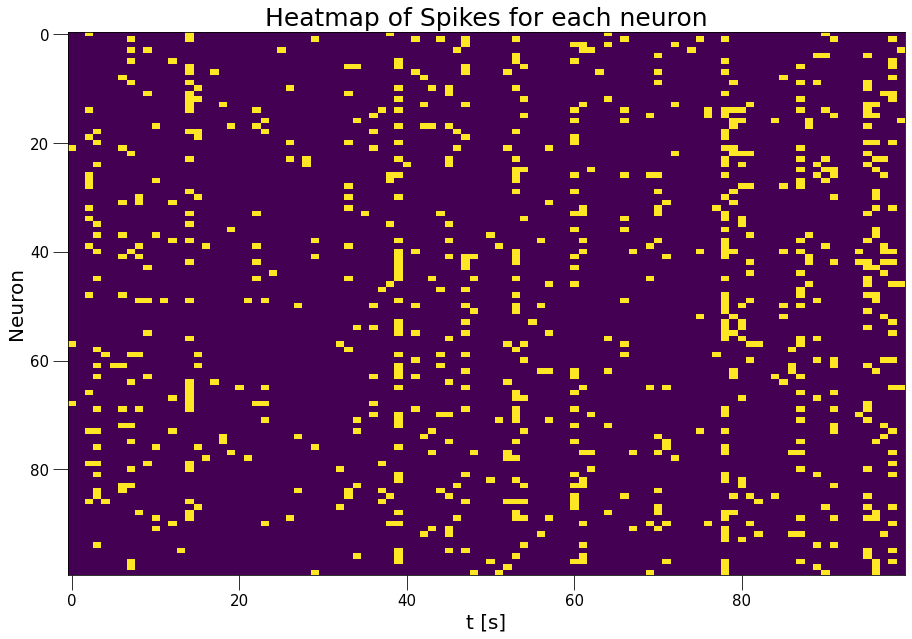

In [3]:
# Plot the spike counts as a heatmap

fig , ax = plt.subplots(figsize=(15,10))

ax.imshow(neuron_spike, cmap='viridis', aspect='auto')
ax.set_title('Heatmap of Spikes for each neuron', fontsize = 25)    
ax.set_xlabel('t [s]', fontsize = 20)
ax.set_ylabel('Neuron', fontsize = 20)   
    

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)

